<a href="https://colab.research.google.com/github/faishalwickson/WaterPotability_SVM/blob/main/Daming_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('./water_potability.csv')

# Eksplorasi Data

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.00,0.08,-0.09,-0.03,0.02,0.02,0.04,0.00,-0.04,-0.00
Hardness,0.08,1.00,-0.05,-0.03,-0.11,-0.02,0.00,-0.01,-0.01,-0.01
Solids,-0.09,-0.05,1.00,-0.07,-0.17,0.01,0.01,-0.01,0.02,0.03
Chloramines,-0.03,-0.03,-0.07,1.00,0.03,-0.02,-0.01,0.02,0.00,0.02
Sulfate,0.02,-0.11,-0.17,0.03,1.00,-0.02,0.03,-0.03,-0.01,-0.02
Conductivity,0.02,-0.02,0.01,-0.02,-0.02,1.00,0.02,0.00,0.01,-0.01
Organic_carbon,0.04,0.00,0.01,-0.01,0.03,0.02,1.00,-0.01,-0.03,-0.03
Trihalomethanes,0.00,-0.01,-0.01,0.02,-0.03,0.00,-0.01,1.00,-0.02,0.01
Turbidity,-0.04,-0.01,0.02,0.00,-0.01,0.01,-0.03,-0.02,1.00,0.00
Potability,-0.00,-0.01,0.03,0.02,-0.02,-0.01,-0.03,0.01,0.00,1.00


In [ ]:
df['Potability'] = df['Potability'].map({1:'Potable', 0:'Not Potable'})

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def displot(features):
  fig = plt.figure(figsize=(10,6))
  sns.displot(data=df, x=df[features], hue="Potability", kind="kde")
  plt.show()

<Figure size 720x432 with 0 Axes>

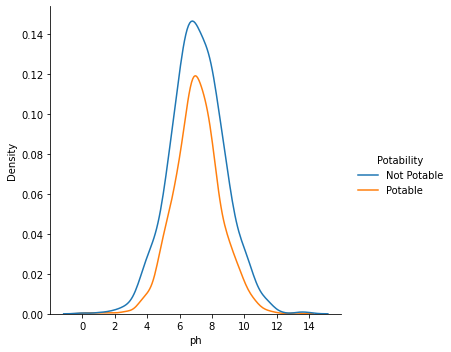

<Figure size 720x432 with 0 Axes>

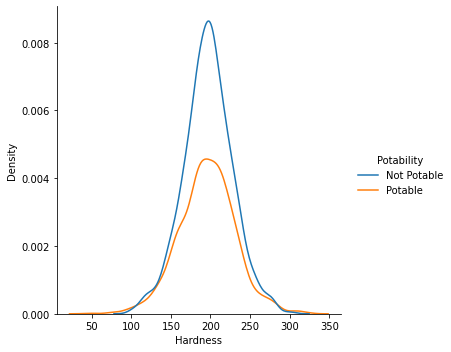

<Figure size 720x432 with 0 Axes>

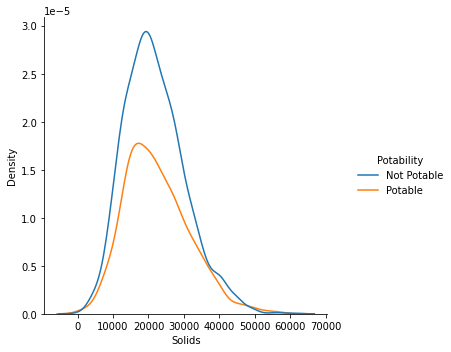

<Figure size 720x432 with 0 Axes>

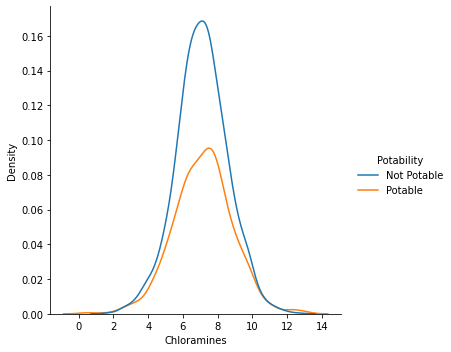

<Figure size 720x432 with 0 Axes>

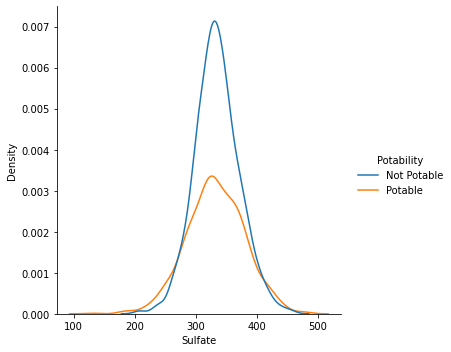

<Figure size 720x432 with 0 Axes>

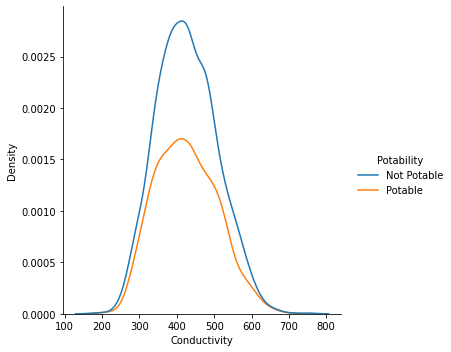

<Figure size 720x432 with 0 Axes>

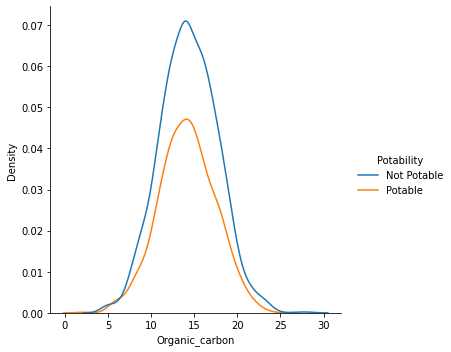

<Figure size 720x432 with 0 Axes>

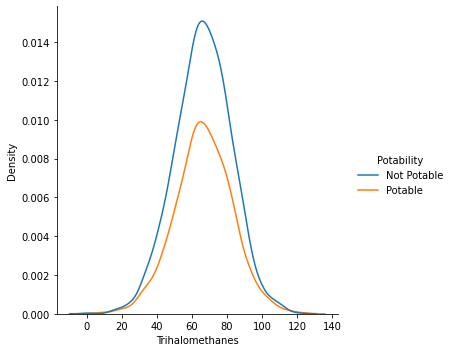

<Figure size 720x432 with 0 Axes>

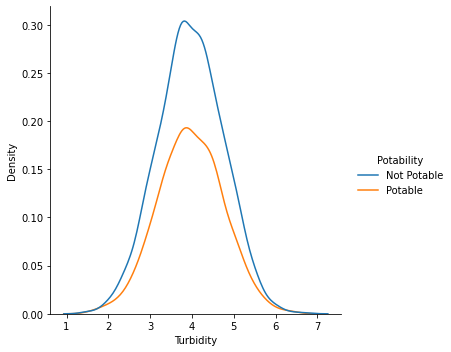

In [ ]:
for feature in ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']:
    displot(feature)

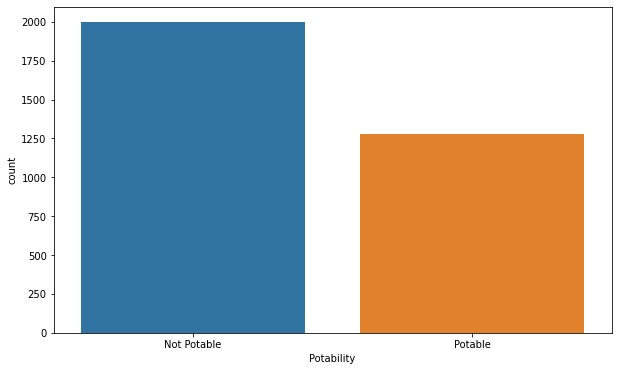

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="Potability",data = df)

In [ ]:
import plotly.express as px

plot_data = df.groupby('Potability')['Potability'].agg(['count']).reset_index()

fig = px.pie(plot_data, values = plot_data['count'], names = plot_data['Potability'])
fig.show()

# Replace Missing Value

In [ ]:
df_sul_chlo = df.dropna(axis = 0, subset=['Sulfate','Chloramines'])
df_sul_chlo = df_sul_chlo.loc[:, ['Sulfate','Chloramines']]

missing_sul = df['Sulfate'].isnull()
chlo_missul = pd.DataFrame(df['Chloramines'][missing_sul])

In [ ]:
X = df_sul_chlo[['Chloramines']]
y = df_sul_chlo[['Sulfate']]

#melatih model reglin ph dengan 80% data training
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

from sklearn.linear_model import LinearRegression

#melatih data
lm = LinearRegression().fit(X_train, y_train)
#menggunakan model latih dan nilai hardness untuk memprediksi nilai ph yang hilang
sul_pred = lm.predict(chlo_missul)

print(lm.score(X_train, y_train))

0.0007972440966849126


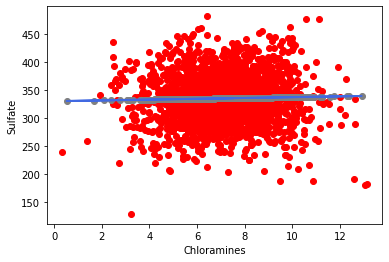

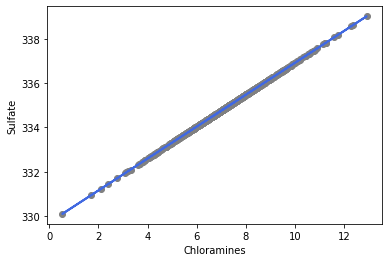

In [ ]:
import matplotlib.pyplot as plt

#visualisasi antara hasil filling missing value dari ph dengan missing value
plt.scatter(df['Chloramines'], df['Sulfate'], color='red')
plt.scatter(chlo_missul, sul_pred, color='gray')
plt.plot(chlo_missul, sul_pred, color='royalblue', linewidth=2)
plt.xlabel("Chloramines")
plt.ylabel("Sulfate")
plt.show()
plt.scatter(chlo_missul, sul_pred, color='gray')
plt.plot(chlo_missul, sul_pred, color='royalblue', linewidth=2)
plt.xlabel("Chloramines")
plt.ylabel("Sulfate")
plt.show()

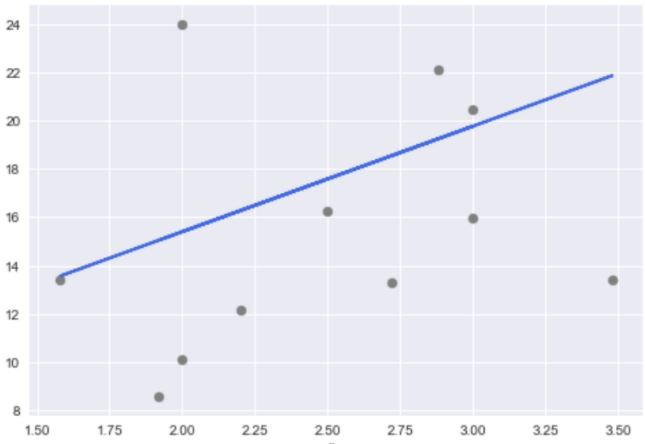

Penggunaan Regresi linear tidak benar-benar menduga dengan baik melainkan menangkap tren umum sehingga single value imputation menggunakan mean ataupun median lebih baik. Adapun solusi lain adalah memperbanyak variabel dalam model regresi ataupun menggunakan regresi stokastik.

In [ ]:
#mencari nilai median
medianph = df['ph'].median()
mediansu = df['Sulfate'].median()
mediantr = df['Trihalomethanes'].median()

#Filling Missing value
df['ph'].fillna(medianph, inplace=True)
df['Sulfate'].fillna(mediansu, inplace=True)
df['Trihalomethanes'].fillna(mediantr, inplace=True)

In [ ]:
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


# Normalization and Split Dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[df.columns[:9]]
y = df['Potability']
# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
#split dataset menjadi data training dan data test
# df.describe()
from sklearn.model_selection import train_test_split
# x = df.drop(['Potability'], axis=1)
# y = df['Potability']

# 70% data train, 30% data test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# #split data training menjadi data training dan data validasi (80:20)
# x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC()
parameters = {
    'kernel': ['rbf'],
    'C':     [1,1000,10000,10000],
    'gamma' : [0.5, 0.05, 0.005,'scale']
}
grid_search = GridSearchCV(model, parameters)
 
# melatih model dengan fungsi fit
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 1000, 10000, 10000],
                         'gamma': [0.5, 0.05, 0.005, 'scale'],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
table = pd.DataFrame(grid_search.cv_results_)
table[['param_C','param_kernel','param_gamma','mean_test_score']]


,param_C,param_kernel,param_gamma,mean_test_score
0,1,rbf,0.5,0.643269
1,1,rbf,0.05,0.660273
2,1,rbf,0.005,0.602268
3,1,rbf,scale,0.666381
4,1000,rbf,0.5,0.621454
5,1000,rbf,0.05,0.626683
6,1000,rbf,0.005,0.660709
7,1000,rbf,scale,0.595725
8,10000,rbf,0.5,0.621454
9,10000,rbf,0.05,0.597032


In [ ]:
# melakukan normalisasi data dengan Min-Max Scaling
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [ ]:
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False)
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
grid_search.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
retest = SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
retest.fit(x_train,y_train)
retest.score(x_train,y_train)


0.7296118621892717

In [ ]:
# Menampilkan skor akurasi prediksi
clf.score(x_train, y_train)

0.7296118621892717

In [ ]:
# Menampilkan skor akurasi prediksi
clf.score(x_test, y_test)

0.6968463886063072

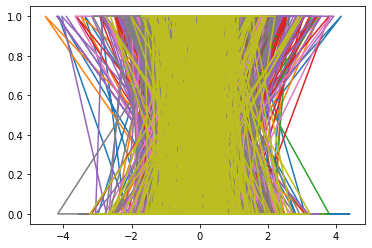

In [ ]:
import matplotlib.pyplot as plt
 
# memvisualisasikan model
# plt.scatter(X, y)
plt.plot(x_test, clf.predict(x_test))

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.69      0.93      0.79       617
     class 1       0.72      0.30      0.42       366

    accuracy                           0.70       983
   macro avg       0.71      0.62      0.61       983
weighted avg       0.70      0.70      0.66       983



# Perbandingan dengan DTree

Accuracy: 0.6378433367243134


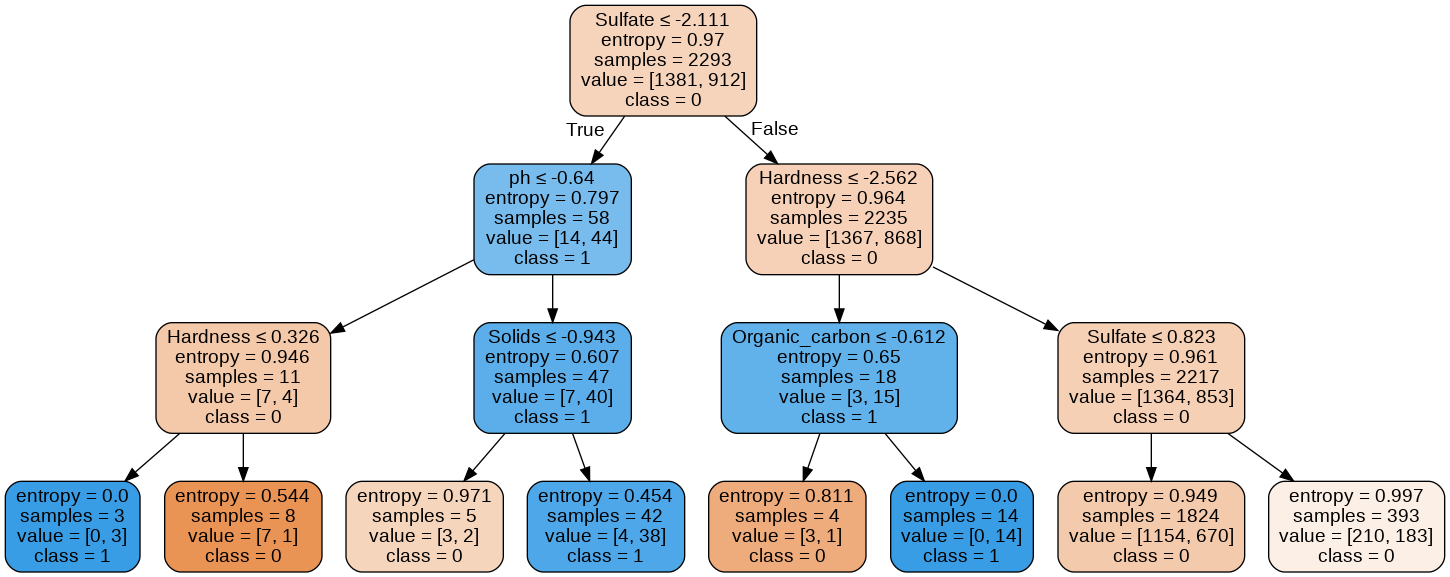

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

feature_cols = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity',]

dtree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtree = dtree.fit(x_train,y_train)
y_pred = dtree.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('water.png')
Image(graph.create_png())
